# Sparks Foundation

# Author : Priyanka Agarwal

# Task-1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here we can see that our data contain two columns Hours and Scores. It depicts the number of hours the student has studied and how much they scored. We have to predict if the student studies for x hours how much score he/she is likely to score.

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


The data does not contain any empty value so we don't have to handle any missing value. Now, let's check for outliers.

Text(0, 0.5, 'Scores')

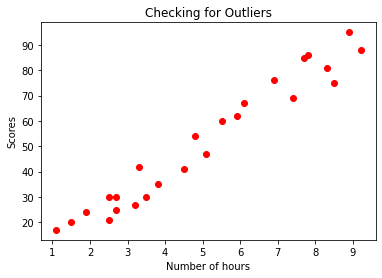

In [6]:
plt.plot(data['Hours'],data['Scores'], 'ro')
plt.title('Checking for Outliers')
plt.xlabel('Number of hours')
plt.ylabel('Scores')

From the above graph we cannot find any outliers.

Now let's partition our data.

In [7]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values.reshape(-1,1)

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

Model Training : Splitting data into train and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
Y_train

array([[35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]], dtype=int64)

In [13]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [18]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [19]:
#Comparing Actual and Predicted Value
compare = pd.DataFrame({'Number of Hours':X_test.flatten(),'Actual Scores' : Y_test.flatten(), 
                        'Predicted Scores' : y_pred.flatten()})
compare

,Number of Hours,Actual Scores,Predicted Scores
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [20]:
pred = lr.predict([[9.25]])
pred

array([[93.69173249]])

Text(0, 0.5, 'Scores')

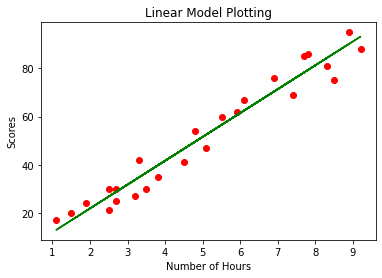

In [21]:
plt.scatter(X,Y,color='red')
plt.plot(X,lr.predict(X),color='green')
plt.title('Linear Model Plotting')
plt.xlabel('Number of Hours')
plt.ylabel('Scores')

In [22]:
lr.score(X_train,Y_train)*100

95.15510725211553

In [23]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(Y_test,y_pred)
error

4.18385989900298